In [1]:
import pandas as pd #importing pandas and other essential functions
import numpy as np 
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# reading train.csv and read.csv to variables, train and read respectively
train = pd.read_csv("M:/Year 1/TeamProject/House-Prices-A4-master/train.csv")
test = pd.read_csv("M:/Year 1/TeamProject/House-Prices-A4-master/test.csv")
# print to make sure all data has been read correctly
print("train (rows,cols):",train.shape)
print("test (rows,cols)",test.shape)

train (rows,cols): (1460, 81)
test (rows,cols) (1459, 80)


In [2]:
# remove the Id column
train.drop("Id", axis = 1, inplace = True)

In [3]:
features = ["TotalSF", "OverallQual", "Total_sqr_footage", ]
X = train[features]

KeyError: "['TotalSF' 'Total_sqr_footage'] not in index"

In [4]:
#Removing not useful columns
train = train.drop('Utilities',axis=1)
test = test.drop('Utilities',axis=1)

train = train.drop('Street',axis=1)
test = test.drop('Street',axis=1)

train = train.drop('PoolQC',axis=1)
test = test.drop('PoolQC',axis=1)

In [5]:
# Handle missing values for features where median/mean or most common value doesn't make sense
#MSSubClass
train.loc[:, "MSSubClass"] = train.loc[:, "MSSubClass"].apply(str)
train.loc[:, "YrSold"] = train.loc[:, "YrSold"].astype(str)
train.loc[:, "MoSold"] = train.loc[:, "MoSold"].astype(str)
train.loc[:, "Exterior1st"] = train.loc[:, "Exterior1st"].fillna(train.loc[:, "Exterior1st"].mode()[0])
train.loc[:, "Exterior2nd"] = train.loc[:, "Exterior2nd"].fillna(train.loc[:, "Exterior2nd"].mode()[0])
train.loc[:, "SaleType"] = train.loc[:, "SaleType"].fillna(train.loc[:, "SaleType"].mode()[0])
train.loc[:, "SaleType"] = train.loc[:, "SaleType"].fillna(test.loc[:, "SaleType"].mode()[0])
train.loc[:, "haspool"] = train.loc[:, "PoolArea"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "has2ndfloor"] = train.loc[:, "2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasgarage"] = train.loc[:, "GarageArea"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasbsmt"] = train.loc[:, "TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
train.loc[:, "hasfireplace"] = train.loc[:, "Fireplaces"].apply(lambda x: 1 if x > 0 else 0)

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)
# TotalBsmtSF : NA most likely means no basement
train.loc[:, "TotalBsmtSF"] = train.loc[:, "TotalBsmtSF"].fillna(0)
train.loc[:, "BsmtFinSF1"] = train.loc[:, "BsmtFinSF1"].fillna(0)
#Electrical : NA most likely means no electricity in the house
train.loc[:, "Electrical"] = train.loc[:, "Electrical"].fillna("SBrkr")

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )
#repeat with test data
test.loc[:, "Alley"] = test.loc[:, "Alley"].fillna("None")
test.loc[:, "BedroomAbvGr"] = test.loc[:, "BedroomAbvGr"].fillna(0)
test.loc[:, "BsmtQual"] = test.loc[:, "BsmtQual"].fillna("No")
test.loc[:, "BsmtCond"] = test.loc[:, "BsmtCond"].fillna("No")
test.loc[:, "BsmtExposure"] = test.loc[:, "BsmtExposure"].fillna("No")
test.loc[:, "BsmtFinType1"] = test.loc[:, "BsmtFinType1"].fillna("No")
test.loc[:, "BsmtFinType2"] = test.loc[:, "BsmtFinType2"].fillna("No")
test.loc[:, "BsmtFullBath"] = test.loc[:, "BsmtFullBath"].fillna(0)
test.loc[:, "BsmtHalfBath"] = test.loc[:, "BsmtHalfBath"].fillna(0)
test.loc[:, "BsmtUnfSF"] = test.loc[:, "BsmtUnfSF"].fillna(0)
test.loc[:, "CentralAir"] = test.loc[:, "CentralAir"].fillna("N")
test.loc[:, "Condition1"] = test.loc[:, "Condition1"].fillna("Norm")
test.loc[:, "Condition2"] = test.loc[:, "Condition2"].fillna("Norm")
test.loc[:, "EnclosedPorch"] = test.loc[:, "EnclosedPorch"].fillna(0)
test.loc[:, "ExterCond"] = test.loc[:, "ExterCond"].fillna("TA")
test.loc[:, "ExterQual"] = test.loc[:, "ExterQual"].fillna("TA")
test.loc[:, "Fence"] = test.loc[:, "Fence"].fillna("No")
test.loc[:, "FireplaceQu"] = test.loc[:, "FireplaceQu"].fillna("No")
test.loc[:, "Fireplaces"] = test.loc[:, "Fireplaces"].fillna(0)
test.loc[:, "Functional"] = test.loc[:, "Functional"].fillna("Typ")
test.loc[:, "GarageType"] = test.loc[:, "GarageType"].fillna("No")
test.loc[:, "GarageFinish"] = test.loc[:, "GarageFinish"].fillna("No")
test.loc[:, "GarageQual"] = test.loc[:, "GarageQual"].fillna("No")
test.loc[:, "GarageCond"] = test.loc[:, "GarageCond"].fillna("No")
test.loc[:, "GarageArea"] = test.loc[:, "GarageArea"].fillna(0)
test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(0)
test.loc[:, "HalfBath"] = test.loc[:, "HalfBath"].fillna(0)
test.loc[:, "HeatingQC"] = test.loc[:, "HeatingQC"].fillna("TA")
test.loc[:, "KitchenAbvGr"] = test.loc[:, "KitchenAbvGr"].fillna(0)
test.loc[:, "KitchenQual"] = test.loc[:, "KitchenQual"].fillna("TA")
test.loc[:, "LotFrontage"] = test.loc[:, "LotFrontage"].fillna(0)
test.loc[:, "LotShape"] = test.loc[:, "LotShape"].fillna("Reg")
test.loc[:, "MasVnrType"] = test.loc[:, "MasVnrType"].fillna("None")
test.loc[:, "MasVnrArea"] = test.loc[:, "MasVnrArea"].fillna(0)
test.loc[:, "MiscFeature"] = test.loc[:, "MiscFeature"].fillna("No")
test.loc[:, "MiscVal"] = test.loc[:, "MiscVal"].fillna(0)
test.loc[:, "OpenPorchSF"] = test.loc[:, "OpenPorchSF"].fillna(0)
test.loc[:, "PavedDrive"] = test.loc[:, "PavedDrive"].fillna("N")
test.loc[:, "PoolArea"] = test.loc[:, "PoolArea"].fillna(0)
test.loc[:, "SaleCondition"] = test.loc[:, "SaleCondition"].fillna("Normal")
test.loc[:, "ScreenPorch"] = test.loc[:, "ScreenPorch"].fillna(0)
test.loc[:, "TotRmsAbvGrd"] = test.loc[:, "TotRmsAbvGrd"].fillna(0)
test.loc[:, "WoodDeckSF"] = test.loc[:, "WoodDeckSF"].fillna(0)
test.loc[:, "TotalBsmtSF"] = test.loc[:, "TotalBsmtSF"].fillna(0)
test.loc[:, "BsmtFinSF1"] = test.loc[:, "BsmtFinSF1"].fillna(0)
test.loc[:, "Electrical"] = test.loc[:, "Electrical"].fillna("None")
test.loc[:, "MSSubClass"] = test.loc[:, "MSSubClass"].apply(str)
test.loc[:, "YrSold"] = test.loc[:, "YrSold"].astype(str)
test.loc[:, "MoSold"] = test.loc[:, "MoSold"].astype(str)
test.loc[:, "Exterior1st"] = test.loc[:, "Exterior1st"].fillna(test.loc[:, "Exterior1st"].mode()[0])
test.loc[:, "Exterior2nd"] = test.loc[:, "Exterior2nd"].fillna(test.loc[:, "Exterior2nd"].mode()[0])
test.loc[:, "SaleType"] = test.loc[:, "SaleType"].fillna(test.loc[:, "SaleType"].mode()[0])
test.loc[:, "haspool"] = test.loc[:, "PoolArea"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "has2ndfloor"] = test.loc[:, "2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasgarage"] = test.loc[:, "GarageArea"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasbsmt"] = test.loc[:, "TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
test.loc[:, "hasfireplace"] = test.loc[:, "Fireplaces"].apply(lambda x: 1 if x > 0 else 0)


# replacing certain subclass and month values with string for better readability e.g. Jan with 1 etc...
test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

#replacing the following attributes with a numerical representation of quality between 1-5 so it can be graphed properly
test = test.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}}
                     )

In [6]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics.append(i)
X.update(X[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numerics2.append(i)
        
skew_features = X[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X[i] = boxcox1p(X[i], boxcox_normmax(X[i] + 1))

NameError: name 'X' is not defined

In [7]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 54
Categorical features : 27


In [8]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 81
Remaining NAs for numerical features in train : 0


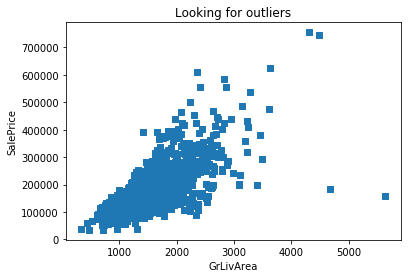

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#checking for any outliers
plt.scatter(train.GrLivArea, train.SalePrice, marker="s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [10]:
#There seem to be outliers where the size of the house is larger than 4000 sq. ft
#It would be best to remove them
train = train[train.GrLivArea < 4000]
train.reset_index(drop=True, inplace=True)

In [11]:
#Look at the correlation to sale price and select the top 10 for the model
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000
OverallQual      0.801
GrLivArea        0.721
ExterQual        0.695
KitchenQual      0.666
GarageCars       0.649
TotalBsmtSF      0.647
GarageArea       0.637
1stFlrSF         0.625
BsmtQual         0.592
FullBath         0.559
TotRmsAbvGrd     0.537
YearBuilt        0.535
FireplaceQu      0.529
YearRemodAdd     0.521
GarageYrBlt      0.499
hasfireplace     0.481
MasVnrArea       0.474
Fireplaces       0.467
HeatingQC        0.435
BsmtFinSF1       0.396
BsmtExposure     0.360
OpenPorchSF      0.330
WoodDeckSF       0.323
BsmtFinType1     0.305
2ndFlrSF         0.297
HalfBath         0.283
GarageQual       0.281
GarageCond       0.270
LotArea          0.270
hasgarage        0.243
PavedDrive       0.237
BsmtFullBath     0.236
BsmtUnfSF        0.221
BsmtCond         0.219
LotFrontage      0.202
BedroomAbvGr     0.161
hasbsmt          0.157
has2ndfloor      0.131
ScreenPorch      0.118
Functional       0.109
3SsnPorch        0.047
PoolArea         0.033
haspool    

In [12]:
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Use root mean square error for checking the error
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [13]:
from sklearn.model_selection import cross_val_score, train_test_split

#Select all features that positively correlate to saleprice
features = ["OverallQual","GrLivArea","ExterQual","KitchenQual","GarageCars","TotalBsmtSF","GarageArea","1stFlrSF","BsmtQual","FullBath","TotRmsAbvGrd","YearBuilt","FireplaceQu","YearRemodAdd","MasVnrArea","Fireplaces","HeatingQC","BsmtFinSF1","BsmtExposure","OpenPorchSF","WoodDeckSF","BsmtFinType1","2ndFlrSF","HalfBath","GarageQual","GarageCond","LotArea","PavedDrive","BsmtFullBath","BsmtUnfSF","BsmtCond","LotFrontage","BedroomAbvGr","ScreenPorch","Functional","3SsnPorch","PoolArea","ExterCond", "haspool", "has2ndfloor", "hasgarage", "hasbsmt", "hasfireplace"]
X = train[features]
#debug: NA finding
#print(X[X.isnull().any(axis=1)])
#X[X.isnull().any(axis=1)].to_csv("NAs.csv",index=False)

In [14]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

# Use 80% of the train data to test the model, then check using the remaining 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1164, 43)
X_test : (292, 43)
y_train : (1164,)
y_test : (292,)


In [15]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# create the linear regression model using the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate the root mean square error on the train and test data
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 0.13380007324369286
RMSE on Test set : 0.13508069668208664


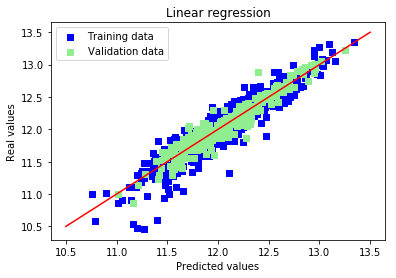

In [16]:
# Show a plot of the training and test data and the linear model used to predict it
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [17]:
# Generate test data
X_final = test[features]

output = test[["Id"]]
#output data to CSV file
output["SalePrice"] = np.expm1(lr.predict(X_final))
print(output) #sanity check values
output[["Id","SalePrice"]].to_csv("output.csv",index=False)

        Id  SalePrice
0     1461 120164.833
1     1462 157827.153
2     1463 174805.917
3     1464 192902.547
4     1465 193108.743
5     1466 167811.109
6     1467 172438.969
7     1468 159600.221
8     1469 195078.685
9     1470 113348.477
10    1471 204993.450
11    1472 112492.120
12    1473 108776.666
13    1474 152501.815
14    1475 124790.523
15    1476 334873.745
16    1477 224043.069
17    1478 279399.067
18    1479 269349.274
19    1480 537393.126
20    1481 320899.557
21    1482 210582.375
22    1483 174404.119
23    1484 173146.557
24    1485 184438.158
25    1486 203047.915
26    1487 324209.717
27    1488 235235.590
28    1489 180044.151
29    1490 234840.217
...    ...        ...
1429  2890  80389.002
1430  2891 141299.913
1431  2892  60084.567
1432  2893  88971.217
1433  2894  60888.795
1434  2895 305259.633
1435  2896 284705.957
1436  2897 191106.488
1437  2898 165273.528
1438  2899 209550.469
1439  2900 149796.952
1440  2901 210380.664
1441  2902 193820.857
1442  2903

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
